# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<div class="span5 alert alert-info">
<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****
</div>

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%pylab inline

df = pd.read_csv('data/human_body_temperature.csv')

Populating the interactive namespace from numpy and matplotlib


# 1. Is the distribution of body temperatures normal? 

(array([  2.,   0.,   3.,   2.,   3.,   4.,   7.,   7.,  12.,  11.,  13.,
         14.,  13.,  18.,   2.,   8.,   5.,   3.,   0.,   0.,   2.,   0.,
          0.,   0.,   1.]),
 array([  96.3 ,   96.48,   96.66,   96.84,   97.02,   97.2 ,   97.38,
          97.56,   97.74,   97.92,   98.1 ,   98.28,   98.46,   98.64,
          98.82,   99.  ,   99.18,   99.36,   99.54,   99.72,   99.9 ,
         100.08,  100.26,  100.44,  100.62,  100.8 ]),
 <a list of 25 Patch objects>)

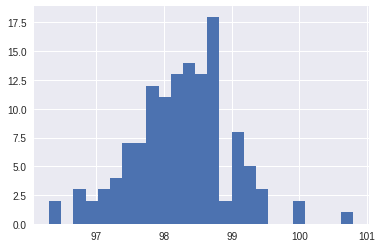

In [58]:
plt.hist(df.temperature.dropna(), bins=25) #histogram plot of all temperature values in the dataset

### No, the histogram does not appear to display a normal distribution.

# 2. Is the sample size large? Are the observations independent? 

In [59]:
len(df) #number of samples collected

130

### 130 samples is large enough, but it is preferrable to have a sample size closer to 1000 if posssible.
### Each row appears to be data points taken from individual people, and each participant appears to have only been tested once, so the observations appear to be independent.

# 3. Is the true population mean really 98.6 degrees F?
    Would you use a one-sample or two-sample test? Why?
    In this situation, is it appropriate to use the tt or zz statistic?
    Now try using the other test. How is the result be different? Why? 

In [60]:
x =df.temperature.mean()
x

98.24923076923076

### A one-sample test should be used to test the significance of the result, because the data is made up of only one sample group, with no experimental difference, unless the research decided to divide the data between males and females. 
### A z statistic is appropriate because the sample size is greater than 30.

In [61]:
#Z score
stdd = df.temperature.std()
(x-98.6)/(stdd/sqrt(130))

-5.4548232923643001

In [62]:
#T score
(x-98.6)/(stdd/sqrt(130))

-5.4548232923643001

### The T and Z scores calculate to be about the same, except that it appears there are no negative T-scores. Even when taking the absolute value of the T score, the degrees of freedom are 129, and at this point on the T distribution chart, the threshold value at 95% is roughly the same as the Z score. 

# 4. At what temperature should we consider someone's temperature to be "abnormal"?
    Start by computing the margin of error and confidence interval. 

In [63]:
#95% - z-score at 97.5% = 1.96
#standard deviation of the mean:
Ox = stdd/sqrt(130)
intval = 1.96*Ox

In [64]:
print 'There is 95% confidence that the real population mean lies between', x-intval, 'and', x+intval, 'degrees.'

There is 95% confidence that the real population mean lies between 98.1231941122 and 98.3752674262 degrees.


### With a confidence level of 95%, temperatures below 98.12 degrees and above 98.38 degrees should be considered "Abnormal".

# 5. Is there a significant difference between males and females in normal temperature?
    What test did you use and why?
    Write a story with your conclusion in the context of the original problem. 

In [65]:
#Split the df into two different df sets, one made up of males and the other of females.
male = df[df.gender == 'M']
female = df[df.gender == 'F']

In [66]:
xm = male.temperature.mean()
xm

98.10461538461539

In [67]:
xf = female.temperature.mean()
xf

98.39384615384616

In [68]:
#Difference of means
dx= xm-xf
dx

-0.2892307692307696

In [69]:
#Variance of the difference of means and the standard deviation
varnc = (male.temperature.var()/len(male)) + (female.temperature.var()/len(female))
stndev = sqrt(varnc)

In [70]:
#95% confidence level ~ z-score = 1.96 and -1.96
thresh = -1.96*stndev
thresh

-0.24804574282285985

### The probability of getting a mean difference of -0.289 is less than 5%, so the Null Hypothesis is rejected, meaning there is a signficant difference between the mean temperature of men versus the mean temperture of women. 

### I concluded this by using a hypothesis significance test and used a confidence level of 95%. 

### According to my calculations, there is a statistically significant difference between the mean temperture of men vs women. My calulations also show that 98.6 is actually not likely to be the true mean of human body tempertures, but it is instead is 95% likely to fall bewteen 98.12 and 98.38 degrees. 